# Minimize experiments

## Minimize the Rosenbrock function

$$ f(x) = \sum_{d=1:D-1} 100 (x_{d+1} - x_d^a)^2 + (1-x_d)^2 $$

In [1]:
from minimize import line_search
from helpers import plot_linesearch
import matplotlib.pyplot as plt

In [2]:
import autograd.numpy as np
from autograd import grad


def convert_to_1d_objective(f, x0, d):
    """
    Converts a multivariate objective function f to the univariate function
    
        g(a) = f(x0 + a * d),
        
    handling the derivatives as well.
    """
    
    def g(a):
        
        ga, dfa = f(x0 + a * d)
        
        dga = np.dot(dfa, d)
        
        return np.array([[ga, dga]])
    
    return g
    

def rosenbrock(x, a):
    
    def f(x, a):
        return np.sum(100 * (x[1:] - x[:-1] ** a) ** 2 + (1 - x[:-1]) ** 2)
    
    df = grad(f, argnum=0)
    
    fx = f(x, a)
    dfx = df(x, a)
    
    return fx, dfx

In [3]:
x = np.ones(shape=(2,))

print(rosenbrock(x, 2))

standard_rosenbrock = lambda x : rosenbrock(x, a=2)

linesearch_objective = convert_to_1d_objective(standard_rosenbrock, x, d=x)

print(linesearch_objective(x))

(0.0, array([0., 0.]))
[[ 401. 1202.]]


In [18]:
def conjugate_gradients(objective, x0, c1, c2, wp_thresh):
    
    t_guess = np.array([1.])
    num_dim = x0.shape[0]
            
    f, df = objective(x0)
    
    d = - df
    g = df
    
    x = x0
    xhist = [x]
    fhist = [f]
    
    for i in range(4 * num_dim):
    
        print(f'CG loop, step {i:3d}')
        
        dnorm = d / np.dot(d, d) ** 0.5
        linesearch_objective = convert_to_1d_objective(objective, x, dnorm)
        
        # Create y0 array
        y0 = np.array([[f, np.dot(df, dnorm)]])
        
        t, y, wp_probs, ms, Vs, iVC, post_probs = line_search(objective=linesearch_objective,
                                                              c1=c1,
                                                              c2=c2,
                                                              wp_thresh=wp_thresh,
                                                              y0=y0,
                                                              t_guess=t_guess)
        
        plot_linesearch(c1=c1,
                        c2=c2,
                        t_data=t,
                        ms=ms,
                        Vs=Vs,
                        iVC=iVC,
                        post_probs=post_probs,
                        wp_probs=wp_probs,
                        x=None,
                        y=y)
        
        idx_best = np.argmax(wp_probs)
        alpha = float(t[idx_best+1])
        t_guess = np.array([alpha])
        
        # Update x
        x = x + alpha * dnorm
        f_, df_ = objective(x)
        
        # Update d and df
        beta = np.dot(df_, (df_ - df)) / np.dot(df, df)
        
        if False: # i > 0 and i % num_dim == 0:
            d = - df_
        else:
            d = - df_ + beta * d
        
        f = f_
        df = df_
        
        print(x)
        input('')
        
        xhist.append(x)
        fhist.append(f)
        
    return np.array(xhist)

CG loop, step   0
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points
Executing linesearch loop, with   4 points


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:506: RuntimeWarning: invalid value encountered in double_scalars
  std = (Vs[0, 0, 0] + Vs[i, 0, 0] - 2 * C0[i-1, 0, 0]) ** 0.5


Executing linesearch loop, with   6 points
Executing linesearch loop, with   9 points


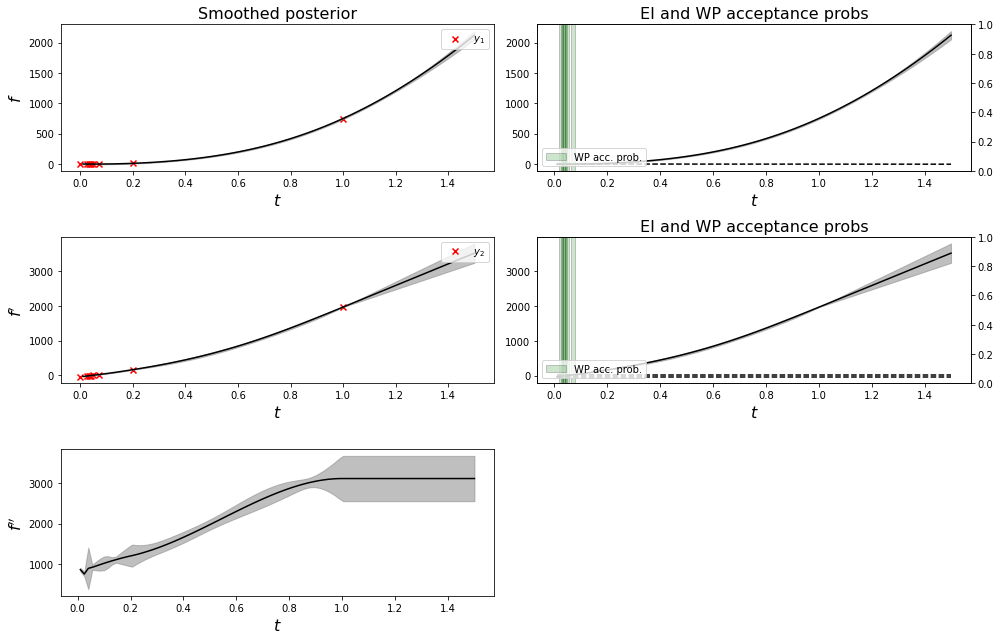

[0.92241078 0.88762595]


CG loop, step   1
Executing linesearch loop, with   2 points


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:84: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:129: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:130: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,


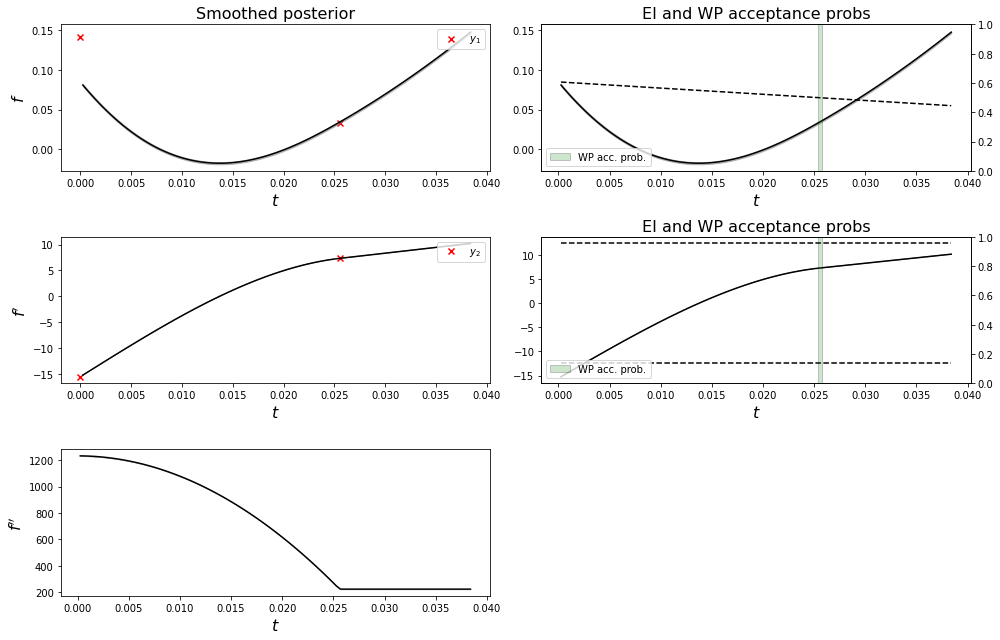

[0.94518159 0.87592765]


CG loop, step   2
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:84: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:129: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:130: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:84: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,


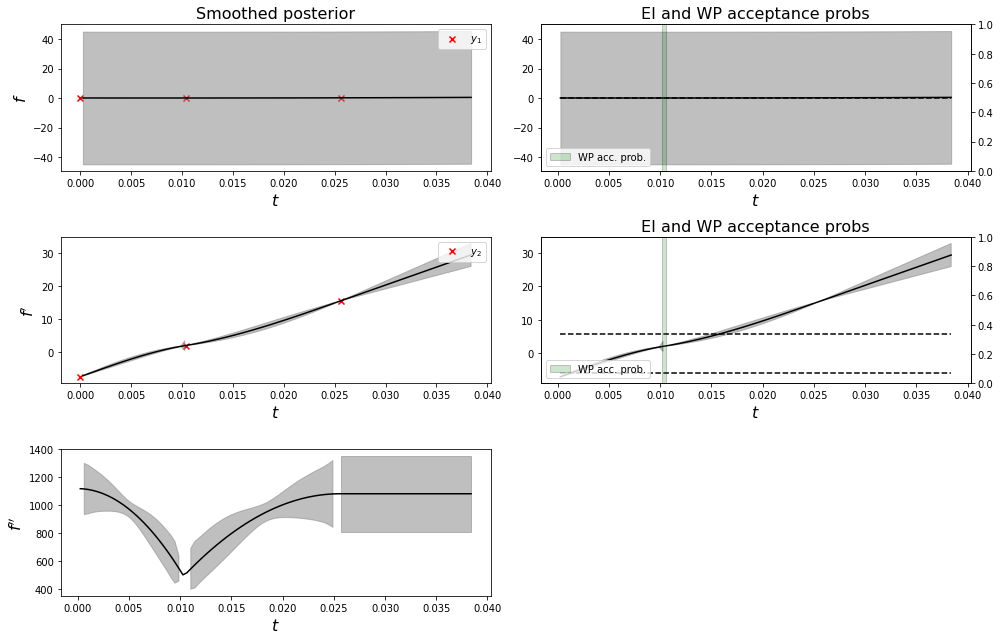

[0.93622062 0.88110561]


CG loop, step   3
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:509: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (alpha - mu) / std
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:84: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:129: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:130: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random

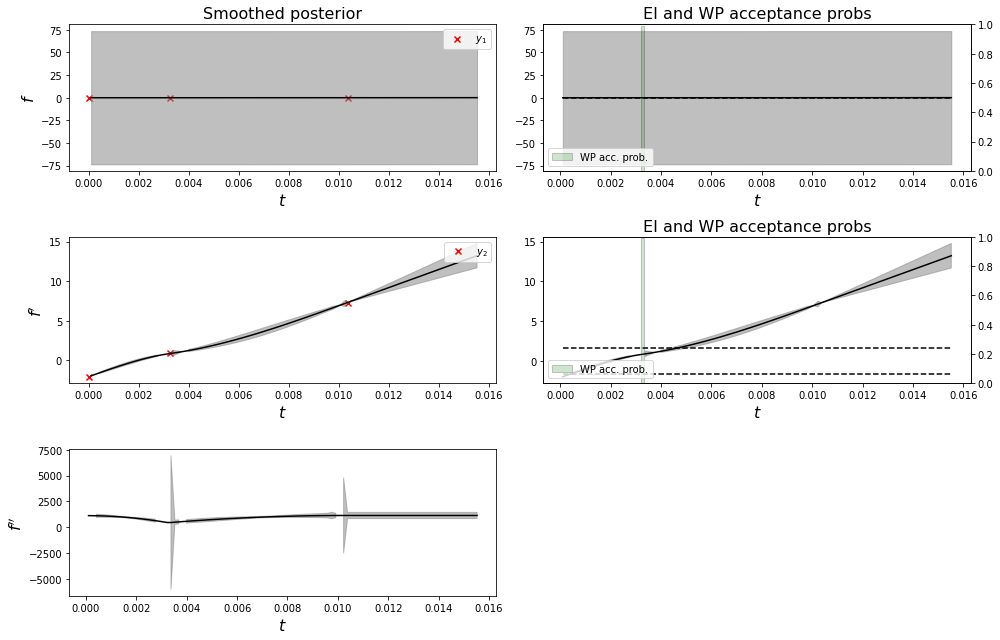

[0.93922991 0.87982914]


CG loop, step   4
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:509: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (alpha - mu) / std
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:84: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:129: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:130: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random

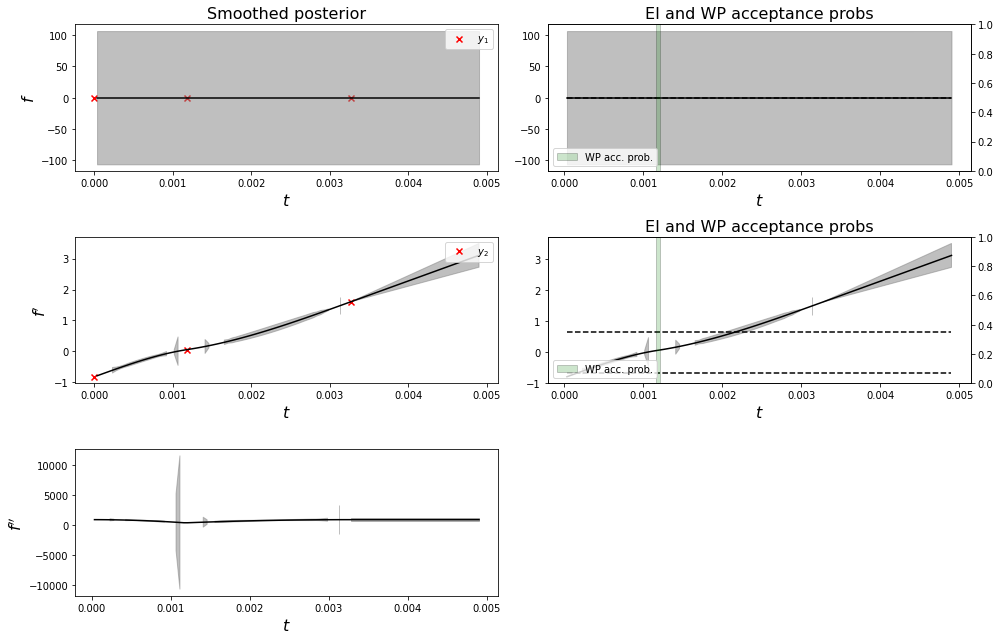

[0.93852074 0.8807749 ]


CG loop, step   5
Executing linesearch loop, with   2 points
Executing linesearch loop, with   3 points


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:509: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (alpha - mu) / std
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:84: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:129: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:130: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random

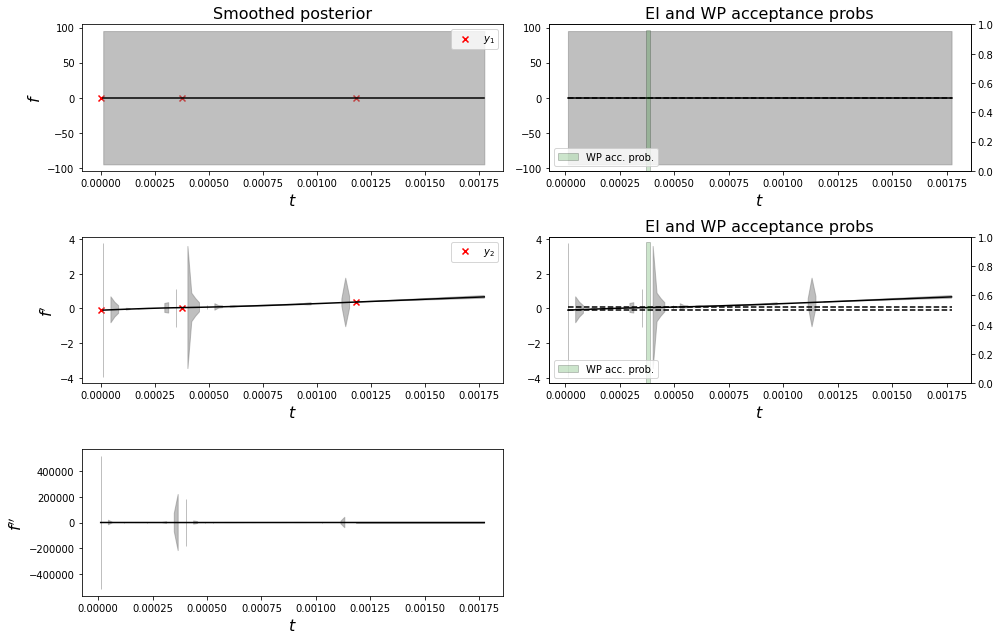

[0.93887431 0.88090738]


CG loop, step   6
Executing linesearch loop, with   2 points
Executing linesearch loop, with   4 points


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:509: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (alpha - mu) / std
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:84: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:129: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:130: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] + v[:, i, i] ** 0.5,
/Users/stratis/repos/random-walks/random-walks/content/misc/pls/helpers.py:83: RuntimeWarning: invalid value encountered in sqrt
  m[:, i] - v[:, i, i] ** 0.5,
/Users/stratis/repos/random

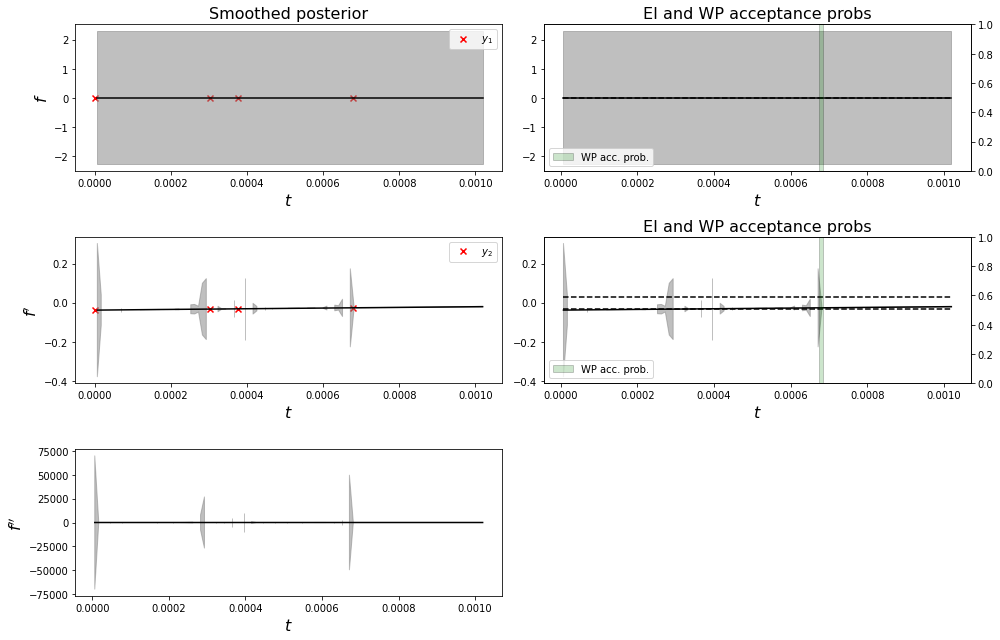

[0.9392723  0.88145831]


CG loop, step   7
Executing linesearch loop, with   2 points


/Users/stratis/repos/random-walks/random-walks/content/misc/pls/minimize.py:509: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (alpha - mu) / std


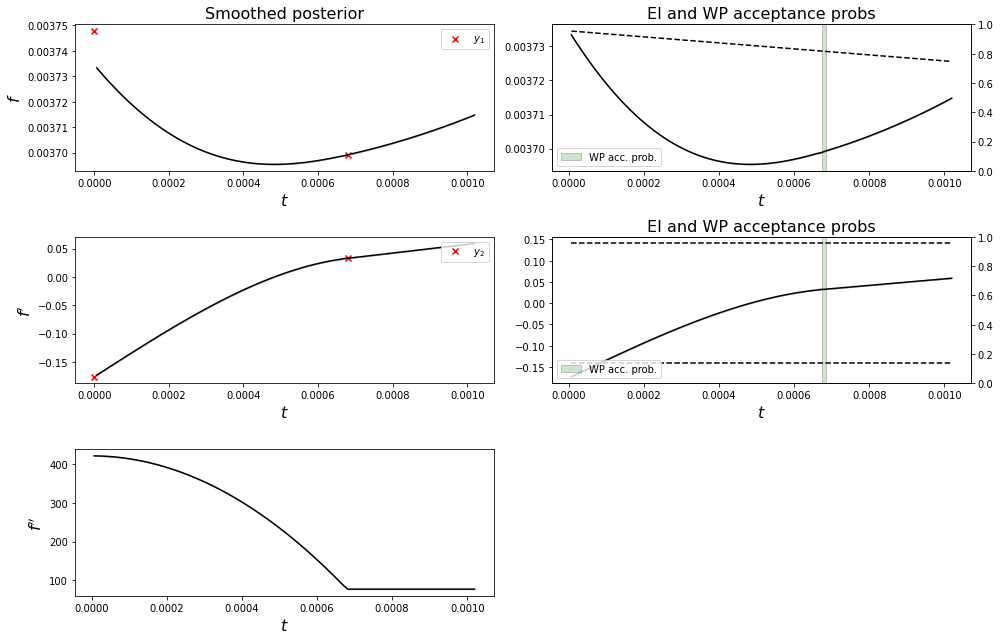

[0.93918274 0.88213203]


In [21]:
c1 = 0.05
c2 = 0.8
wp_thresh = 0.95
x0 = np.array([0.9, 0.9])

standard_rosenbrock = lambda x : rosenbrock(x, a=2)

xhist = conjugate_gradients(objective=standard_rosenbrock,
                            x0=x0,
                            c1=c1,
                            c2=c2,
                            wp_thresh=wp_thresh)

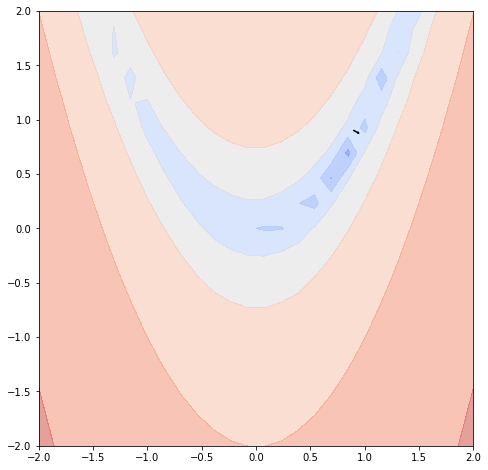

In [22]:
plt.figure(figsize=(8, 8))
x1, x2 = np.meshgrid(np.linspace(-3., 3., 40), np.linspace(-3., 6., 40))
x = np.stack([x1, x2], axis=-1)
x = np.reshape(x, (-1, 2))

f = np.array([standard_rosenbrock(x_)[0] for x_ in x])
f = np.reshape(f, (x1.shape[0], x1.shape[0]))

plt.contourf(x1, x2, np.log(f) + 1e-6, cmap='coolwarm', alpha=0.5)
plt.plot(xhist[:, 0], xhist[:, 1], color='black')
plt.gca().set_aspect('equal')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

# Notes

- Stop checking beyond first positive gradient.
- Check numerical stability. Sometimes error bars seem way too large.